In [18]:
import tensorflow as tf
import keras
from keras.models import load_model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
image_size = (256,256)
class_names = [ 'meningioma','glioma', 'pituitary']

In [21]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/model_final_multi-classification.h5') 



In [22]:
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Colab Notebooks/dataset/yes/y1179.jpg", 
    target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
score = predictions[0]
print(score)

[-0.7802933   0.7334533  -0.51848346]


In [23]:
batch = 32

In [24]:
test = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/dataset/Testing",
            seed = 42,
            
            batch_size = batch)

Found 289 files belonging to 3 classes.


In [25]:
test = test.prefetch(buffer_size=32)

In [26]:
import numpy as np
img = keras.preprocessing.image.load_img(
    "/content/drive/MyDrive/Colab Notebooks/dataset/BrainTumor/meningioma/101.jpg", 
    target_size=image_size
    )
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = np.argmax(model.predict(img_array))
print(class_names[predictions])

glioma


In [27]:
results = model.evaluate(test)
print("test loss, test acc:", results)

10/10 [==============================] - 61s 6s/step - loss: 1.6399 - accuracy: 0.4740
test loss, test acc: [1.6399195194244385, 0.4740484356880188]


In [28]:
labels_entire = []
pred_entire = []
for image_batch,label_batch in test.as_numpy_iterator():
    prediction = model.predict_on_batch(image_batch).flatten()

    # Apply a sigmoid since our model returns logits
    predictions = tf.nn.sigmoid(prediction).numpy()

    n = 0
    predict = []
    while n<=(predictions.shape[0]-3):
        pred = np.argmax(predictions[n:n+3]) #Returns the index of the largest element in the selected subarray
        n+=3
        pred_entire.append(pred)
    for el in label_batch:
        labels_entire.append(el)
pred_entire = np.array(pred_entire)
labels_entire = np.array(labels_entire)
print(pred_entire)
print(labels_entire)

[0 1 2 0 2 0 2 2 2 0 2 0 0 1 2 0 1 2 2 2 0 1 2 0 0 0 2 0 2 0 0 2 2 2 2 1 2
 2 0 2 1 1 2 2 2 1 0 0 1 0 1 1 2 1 2 1 1 2 1 2 0 1 0 0 2 0 1 1 1 2 2 1 0 0
 0 0 2 2 1 2 2 0 2 1 2 2 1 2 0 0 2 2 1 2 1 1 0 0 2 2 1 2 2 2 2 1 2 1 2 0 1
 2 1 1 0 2 2 2 2 0 1 0 2 1 0 2 2 1 2 1 0 1 0 0 2 2 0 0 0 1 2 1 2 0 2 2 0 2
 2 2 1 0 0 1 0 0 2 0 0 1 0 1 1 2 2 1 2 0 2 1 2 2 2 2 0 1 2 2 0 2 0 0 1 2 1
 2 2 0 0 1 2 2 2 2 2 0 2 2 2 0 2 1 0 2 1 0 0 0 2 2 1 2 2 1 0 2 2 0 1 2 1 2
 0 2 1 0 0 1 2 1 0 2 1 2 2 2 0 1 0 2 0 1 2 0 2 0 2 0 0 0 2 2 1 1 2 2 2 2 0
 1 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 1 0 2 2 1 1 2 1 0 2 2 1]
[0 0 1 0 0 2 2 1 1 0 2 0 1 1 1 0 0 0 2 1 0 1 0 0 0 0 2 1 0 0 0 1 1 1 2 1 1
 2 1 0 2 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 2 0 2 0 2 0 1 2 1 2 0 1 1 2 2 0 1
 0 0 0 2 0 1 1 1 1 1 1 2 0 1 1 0 2 2 1 2 0 0 1 0 1 0 1 0 1 1 2 1 0 1 1 0 1
 1 0 2 0 1 1 0 2 0 1 0 2 2 0 1 2 2 2 0 1 0 0 0 2 2 1 0 1 1 1 2 2 1 2 1 0 1
 2 2 0 0 0 1 1 0 1 1 0 1 1 2 1 2 0 1 2 0 2 1 2 1 2 2 0 0 1 1 0 1 0 0 1 1 0
 2 2 1 0 2 2 0 0 2 0 1 1 1 1 1 2 1 0 1

In [29]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
print(classification_report(labels_entire, pred_entire, target_names=class_names))

              precision    recall  f1-score   support

  meningioma       0.60      0.50      0.54       100
      glioma       0.43      0.26      0.32       115
   pituitary       0.42      0.77      0.55        74

    accuracy                           0.47       289
   macro avg       0.48      0.51      0.47       289
weighted avg       0.48      0.47      0.46       289



In [30]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(labels_entire, pred_entire), 2)}") 


Accuracy: 0.47


In [31]:
#print(f"Precision: {round(precision_score(labels_entire, pred_entire), 2)}")
#print(f"Recall: {round(recall_score(labels_entire, pred_entire), 2)}")
#print(f"F1_score: {round(f1_score(labels_entire, pred_entire), 2)}")

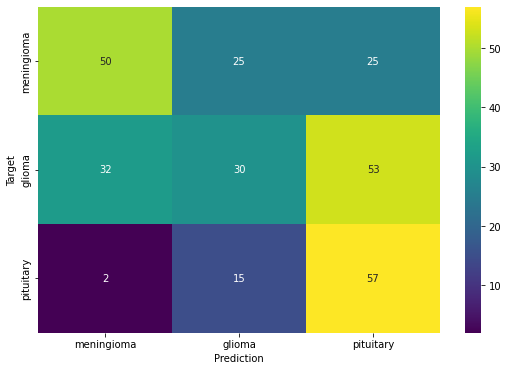

In [32]:
from sklearn.metrics import confusion_matrix

arr = confusion_matrix(labels_entire, pred_entire)
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()